### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Employee Attrition Prediction</div></b>
Employee attrition refers to the phenomenon of employees leaving an organization voluntarily or involuntarily. Predicting employee attrition can help organizations proactively identify and address factors that contribute to employee turnover.

Building a predictive model for employee attrition can provide valuable insights to optimize employee retention strategies.

##### Objectives:

This project focuses on predicting employee attrition using a classification model. The dataset includes various features such as employee demographics, job roles, and performance metrics. The goal is to identify key factors contributing to attrition and develop a model that accurately predicts whether an employee is likely to leave the company.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import joblib

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
data = pd.read_csv(r"C:\Users\Harrison\Downloads\train_data.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Drop off some redundant features
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','MonthlyIncome', 'MonthlyRate'], axis=1, inplace=True)

# create a copy of the dataset for model building
df = data.copy()

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Scale numerical features
scaler = MinMaxScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
df_cat_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))

# Combine scaled numerical and encoded categorical features
df_preprocessed = pd.concat([df_num_scaled, df_cat_encoded], axis=1)

# Save preprocessed data
df_preprocessed.to_csv('preprocessed_data.csv', index=False)

In [5]:
df_preprocessed.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_data.csv')

# Define the target variable and features
target = 'Attrition'  
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the test set for evaluation
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Accuracy on Test Set: 0.88
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93       267
         1.0       0.85      0.33      0.48        51

    accuracy                           0.88       318
   macro avg       0.87      0.66      0.71       318
weighted avg       0.88      0.88      0.86       318



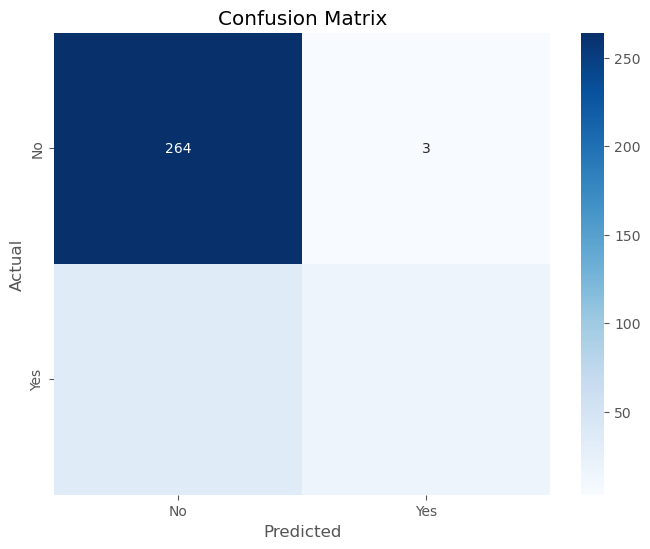

K-Fold Cross-Validation Scores: [0.875      0.78125    0.8125     0.88888889 0.87301587]
Mean CV Accuracy: 0.85 ± 0.04

K-Fold Cross-Validation is used to evaluate the robustness of the model by splitting the data into k subsets (folds).
The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, and the 
performance metric (accuracy in this case) is calculated for each iteration. The mean and standard deviation 
of the accuracy scores provide a more reliable estimate of the model's performance and its ability to generalize 
to unseen data.



In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

# Load the test data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').values.ravel()

# Load the trained model
model = joblib.load('logistic_model.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.2f}')

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')

print(f'K-Fold Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Explanation of K-Fold Cross-Validation Score
print("""
K-Fold Cross-Validation is used to evaluate the robustness of the model by splitting the data into k subsets (folds).
The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, and the 
performance metric (accuracy in this case) is calculated for each iteration. The mean and standard deviation 
of the accuracy scores provide a more reliable estimate of the model's performance and its ability to generalize 
to unseen data.
""")


In [8]:
conf_matrix

array([[264,   3],
       [ 34,  17]], dtype=int64)

#### Productionizing Our Model

We will use our trained model to make inferences on unseen test data

In [10]:
# Import test dataset
test_data = pd.read_excel(r"C:\Users\Harrison\Downloads\employee_attrition\unseen test_data\test.xlsx")
test_data.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0


##### Preprocess The Unseen Test Data Similar to the Training Data

In [12]:
# Apply transforms to the new data similar to the training dataset

test_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [13]:
# Separate numerical and categorical columns of the unseen test_data
num_var = test_data.select_dtypes(include=['int64', 'float64']).columns
cat_var = test_data.select_dtypes(include=['object', 'category']).columns

# Scale numerical features on the unseen test_data
scaler = MinMaxScaler()
num_var_scaled = pd.DataFrame(scaler.fit_transform(test_data[num_var]), columns=num_var)

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
cat_var_encoded = pd.DataFrame(encoder.fit_transform(test_data[cat_var]), columns=encoder.get_feature_names_out(cat_var))

# Combine scaled numerical and encoded categorical features of the unseen test_data
test_data_preprocessed = pd.concat([num_var_scaled, cat_var_encoded], axis=1)

# Save preprocessed the unseen test_data
test_data_preprocessed.to_csv('test_data_preprocessed_data.csv', index=False)

##### Make Inference on the Preprocessed Unseen Test Data

In [15]:
# Load the trained model
model = joblib.load('logistic_model.pkl')

# Make predictions on the unseen data
predictions = model.predict(test_data_preprocessed)

test_data['Predicted_Attrition'] = predictions

# Display the DataFrame with predictions
print(test_data.head())

   Age     BusinessTravel  DailyRate              Department  \
0   34      Travel_Rarely        790                   Sales   
1   35      Travel_Rarely        660                   Sales   
2   24  Travel_Frequently        381  Research & Development   
3   24         Non-Travel        830                   Sales   
4   44  Travel_Frequently       1193  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                24          4        Medical                        1   
1                 7          1  Life Sciences                        4   
2                 9          3        Medical                        2   
3                13          2  Life Sciences                        4   
4                 2          1        Medical                        2   

   Gender  HourlyRate  ...  RelationshipSatisfaction  StockOptionLevel  \
0  Female          40  ...                         3                 0   
1    Male          76 

In [16]:
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predicted_Attrition
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,Female,40,...,3,0,16,2,4,15,9,10,10,1.0
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,4,Male,76,...,1,1,1,3,3,1,0,0,0,0.0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,2,Male,89,...,3,0,4,2,2,0,0,0,0,1.0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,4,Female,78,...,3,1,1,2,3,1,0,0,0,0.0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,2,Male,86,...,2,0,16,2,2,2,2,2,2,1.0
